In [60]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [61]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('hermosilo.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [62]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL
0,01/02/2019,20:20,242,343,1.8,3.3,25.3,39,990.2,0.0,477.0
1,01/02/2019,20:30,218,323,1.5,4.0,25.2,39,989.9,0.0,402.0
2,01/02/2019,20:40,233,349,1.6,3.7,24.9,40,989.8,0.0,426.0
3,01/02/2019,20:50,258,328,1.6,3.4,24.8,40,989.7,0.0,299.0
4,01/02/2019,21:00,243,311,1.7,3.0,24.5,41,989.5,0.0,324.0


In [63]:


# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)



In [64]:


# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes



DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
RAPVIENTO2    float64
RAPRAFAGA2    float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [65]:


# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)



In [66]:


df.head()



,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL,FECHA
0,242,343,1.8,3.3,25.3,39,990.2,0.0,477.0,2019-02-01 20:20:00
1,218,323,1.5,4.0,25.2,39,989.9,0.0,402.0,2019-02-01 20:30:00
2,233,349,1.6,3.7,24.9,40,989.8,0.0,426.0,2019-02-01 20:40:00
3,258,328,1.6,3.4,24.8,40,989.7,0.0,299.0,2019-02-01 20:50:00
4,243,311,1.7,3.0,24.5,41,989.5,0.0,324.0,2019-02-01 21:00:00


In [67]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0,134.000000
mean,171.820896,215.410448,1.629851,3.012687,17.923134,64.410448,991.179851,0.0,86.402985
std,88.292222,93.314507,0.848797,1.670146,4.003756,13.883626,1.548891,0.0,142.422971
min,35.000000,1.000000,0.600000,1.000000,13.300000,35.000000,988.700000,0.0,-1.000000
25%,94.250000,141.250000,1.100000,1.900000,14.800000,57.000000,990.200000,0.0,-1.000000
50%,118.500000,178.000000,1.350000,2.400000,16.100000,69.000000,991.100000,0.0,-1.000000
75%,259.000000,305.750000,1.800000,3.650000,20.200000,77.000000,991.700000,0.0,131.500000
max,318.000000,358.000000,4.200000,7.600000,26.400000,81.000000,994.500000,0.0,585.000000


In [68]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL,FECHA
2,233,349,1.6,3.7,24.9,40,989.8,0.0,426.0,2019-02-01 20:40:00
3,258,328,1.6,3.4,24.8,40,989.7,0.0,299.0,2019-02-01 20:50:00
4,243,311,1.7,3.0,24.5,41,989.5,0.0,324.0,2019-02-01 21:00:00
7,270,332,1.7,3.5,24.6,40,989.2,0.0,269.0,2019-02-01 21:30:00
8,250,314,1.7,2.8,24.4,42,989.1,0.0,269.0,2019-02-01 21:40:00
9,261,40,1.2,2.7,24.7,41,989.1,0.0,269.0,2019-02-01 21:50:00
10,259,340,1.8,3.4,24.2,42,989.0,0.0,211.0,2019-02-01 22:00:00
11,276,77,1.4,2.8,24.3,41,989.0,0.0,218.0,2019-02-01 22:10:00
19,247,295,4.2,7.6,24.5,44,988.8,0.0,259.0,2019-02-01 23:30:00
20,242,307,4.0,7.0,24.5,45,988.9,0.0,241.0,2019-02-01 23:40:00


In [69]:


# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()



DIRS          171.820896
DIRR          215.410448
RAPVIENTO2      1.629851
RAPRAFAGA2      3.012687
TEMP           17.923134
HR             64.410448
PB            991.179851
PREC            0.000000
RADSOL         86.402985
dtype: float64

In [70]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

17.923134328358202

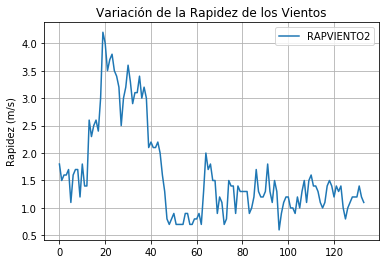

In [71]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.RAPVIENTO2.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

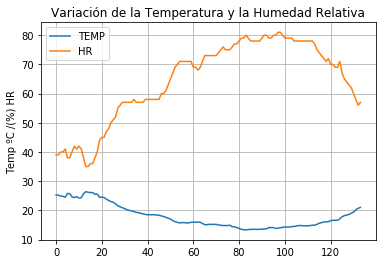

In [72]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
df2 = df[["FECHA"]]
plt.figure(); df1.plot() ;plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

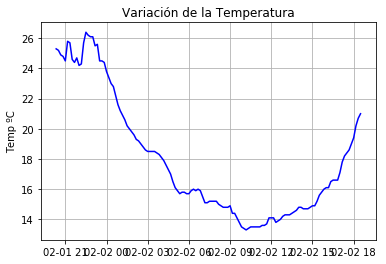

In [73]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

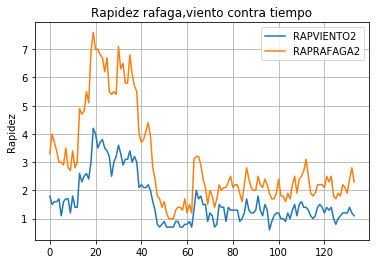

In [74]:
#RAPIDEZ RAFAJA Y RAPIDEZ VIENTO
df1 = df[['RAPVIENTO2','RAPRAFAGA2']]
plt.figure(); df1.plot() ;plt.legend(loc='best')
plt.title("Rapidez rafaga,viento contra tiempo")
plt.ylabel("Rapidez")
plt.grid(True)
plt.show()

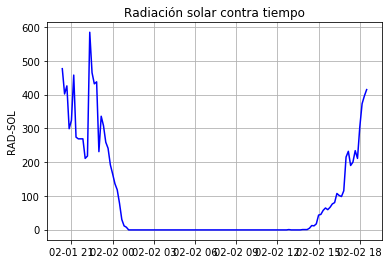

In [76]:
#Radaición solar contra tiempo
plt.plot_date(x=df.FECHA, y=df.RADSOL , fmt="b-")
plt.title("Radiación solar contra tiempo")
plt.ylabel("RAD-SOL")
plt.grid(True)
plt.show()

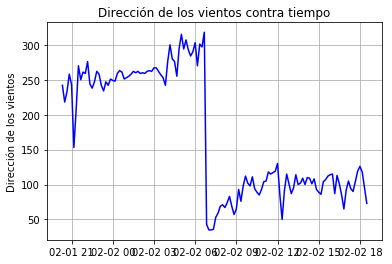

In [77]:
#DIRECCIÓN DE LOS VIENTOS
plt.plot_date(x=df.FECHA, y=df.DIRS , fmt="b-")
plt.title("Dirección de los vientos contra tiempo")
plt.ylabel("Dirección de los vientos")
plt.grid(True)
plt.show()

In [78]:
df.describe()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0,134.000000
mean,171.820896,215.410448,1.629851,3.012687,17.923134,64.410448,991.179851,0.0,86.402985
std,88.292222,93.314507,0.848797,1.670146,4.003756,13.883626,1.548891,0.0,142.422971
min,35.000000,1.000000,0.600000,1.000000,13.300000,35.000000,988.700000,0.0,-1.000000
25%,94.250000,141.250000,1.100000,1.900000,14.800000,57.000000,990.200000,0.0,-1.000000
50%,118.500000,178.000000,1.350000,2.400000,16.100000,69.000000,991.100000,0.0,-1.000000
75%,259.000000,305.750000,1.800000,3.650000,20.200000,77.000000,991.700000,0.0,131.500000
max,318.000000,358.000000,4.200000,7.600000,26.400000,81.000000,994.500000,0.0,585.000000
